<img style="float:center" src="img/explore.jpg" width=300/>

# Exploring the data

When we look at spreadsheets or large amounts of data, its hard for us to understand what is really happening. But when we visually interpret the data then everything starts making sense.

<img style="float::left" src="img/explore-reason.png" />

** Question 1. Find the total number of hard disks for a given model **

** Question 2. Find total failures for a hard disk models **

** Question 3. How do you compute failure rate for a model **

** Question 4. Given a model and capacity bytes, what does failure count look like**

** Question 5. Let us count how many days each hard disk ran**

** Question 6. Find the average running time for failed hard disks and average running time for hard disks that have not failed**

** Question 7. How about using hours (SMART_9) column now and co-relate it with failure**

** Question 8. Given the data , identify the model and capacity of the hard disk to buy based on how long it runs**

## Step by step approach

** First let us look at our data **

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=15,10

In [21]:
df = pd.read_csv('data/data.csv')

Let us take a sneak peek at the data

In [22]:
df.head()

,Unnamed: 0,model,date,serial,capacity,failure,smart_1,smart_5,smart_9,smart_194,smart_197
0,0,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNG9Z0XA,3000592982016,0,0,0,6887,29,0
1,1,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNG9Z7LA,3000592982016,0,0,0,6444,26,0
2,2,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNGABYAA,3000592982016,0,0,0,5592,28,0
3,3,Hitachi HDS5C4040ALE630,2013-08-07,PL1321LAG34XWH,4000787030016,0,0,0,3555,30,0
4,4,Hitachi HDS5C4040ALE630,2013-08-07,PL1311LAG2205A,4000787030016,0,0,0,3557,28,0


What is the size of the dataset?

In [23]:
df.shape

(2995393, 11)

Now we see that there are different models of hard disks, let us list them

<img style="float:center" src="img/distinct.gif" />

In [24]:
df_model = pd.DataFrame(df.model.unique(),columns=['model'])

In [25]:
df_model.head()

,model
0,Hitachi HDS5C3030ALA630
1,Hitachi HDS5C4040ALE630
2,Hitachi HDS723030ALA640
3,Hitachi HDS722020ALA330
4,ST31500541AS


In [26]:
df_model.count()[0]

39

let us see how many models are there in total

In [27]:

print "Total number of distinct models : "+ str(df_model.count()[0])

Total number of distinct models : 39


In [28]:
# Exerice 1: Find the distinct number of serial numbers

In [29]:
# Exercise 2: Find the distinct number of capacity bytes

<img style="float:center" src="img/group-by.gif" />

## Question 1. Find the total number of hard disks for a given model

Now let us see how many hard disks are there for each model and visualize it.

We see that serial number represents the hard disk and they are related to a model i.e multiple serial numbers belongs to one type of model


In [30]:
df_model_serial = pd.DataFrame(df.groupby(['model']).serial.nunique())

In [31]:
df_model_serial.head()

,serial
model,
HGST HMS5C4040ALE640,45
Hitachi HDS5C3030ALA630,4606
Hitachi HDS5C3030BLE630,1
Hitachi HDS5C4040ALE630,2685
Hitachi HDS722020ALA330,4733


In [32]:
df_model_serial = df_model_serial.reset_index()

In [33]:
df_model_serial.head()

,model,serial
0,HGST HMS5C4040ALE640,45
1,Hitachi HDS5C3030ALA630,4606
2,Hitachi HDS5C3030BLE630,1
3,Hitachi HDS5C4040ALE630,2685
4,Hitachi HDS722020ALA330,4733


In [34]:
df_model_serial.columns = ['model','total_HD']

In [35]:
df_model_serial.head(39)

,model,total_HD
0,HGST HMS5C4040ALE640,45
1,Hitachi HDS5C3030ALA630,4606
2,Hitachi HDS5C3030BLE630,1
3,Hitachi HDS5C4040ALE630,2685
4,Hitachi HDS722020ALA330,4733
5,Hitachi HDS723020BLA642,8
6,Hitachi HDS723030ALA640,1034
7,Hitachi HDS723030BLE640,7
8,Hitachi HDT721010SLA360,15
9,SAMSUNG HD103UJ,14


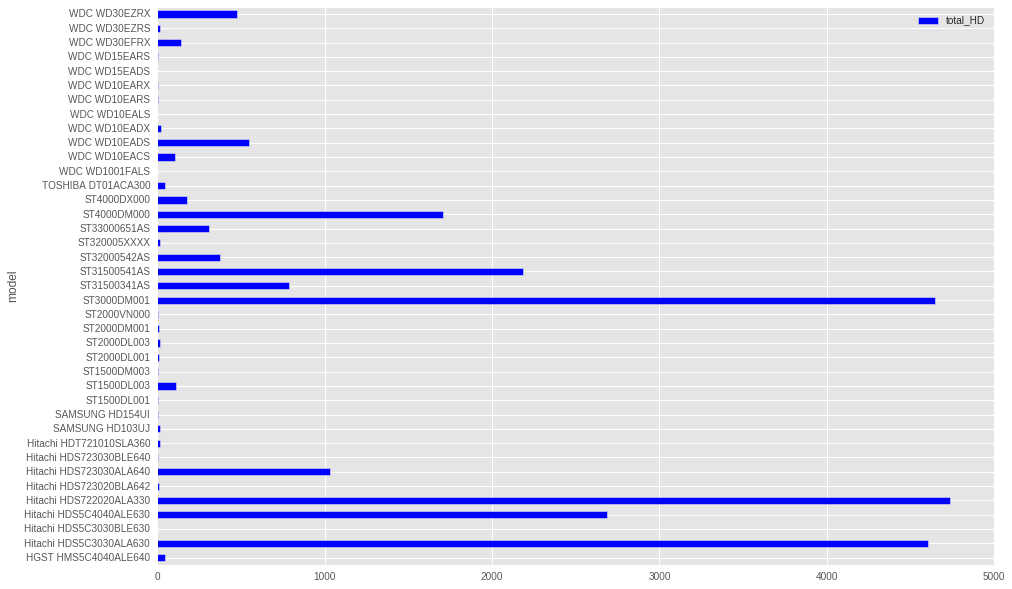

In [36]:
df_model_serial.plot(kind="barh",x="model",y="total_HD")

Sort and plot

In [37]:
df_model_serial.sort_values(by='total_HD',inplace=True)

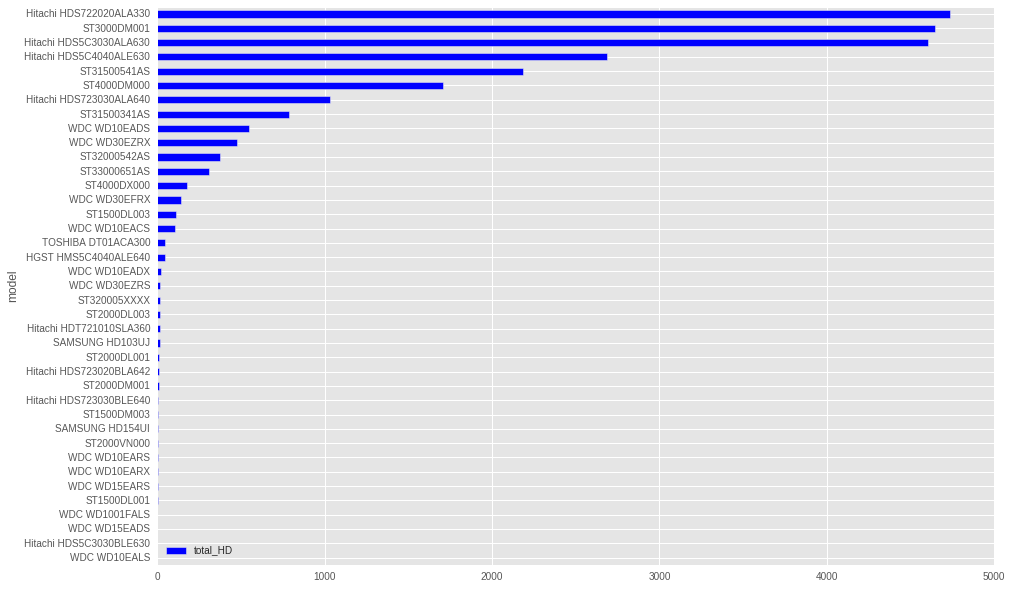

In [38]:
df_model_serial.plot(kind="barh",x="model",y="total_HD")

In [39]:
#Exercise 3: Find the count of different capacity bytes for a model and plot with and without sorting

## Question 2. Find failures for a hard disk models

In [40]:
df_fail = pd.DataFrame(df.groupby('model').failure.sum())

In [41]:
df_fail.head()

,failure
model,
HGST HMS5C4040ALE640,1
Hitachi HDS5C3030ALA630,15
Hitachi HDS5C3030BLE630,0
Hitachi HDS5C4040ALE630,16
Hitachi HDS722020ALA330,16


In [42]:
df_fail = df_fail.reset_index()

In [43]:
df_fail.head()

,model,failure
0,HGST HMS5C4040ALE640,1
1,Hitachi HDS5C3030ALA630,15
2,Hitachi HDS5C3030BLE630,0
3,Hitachi HDS5C4040ALE630,16
4,Hitachi HDS722020ALA330,16


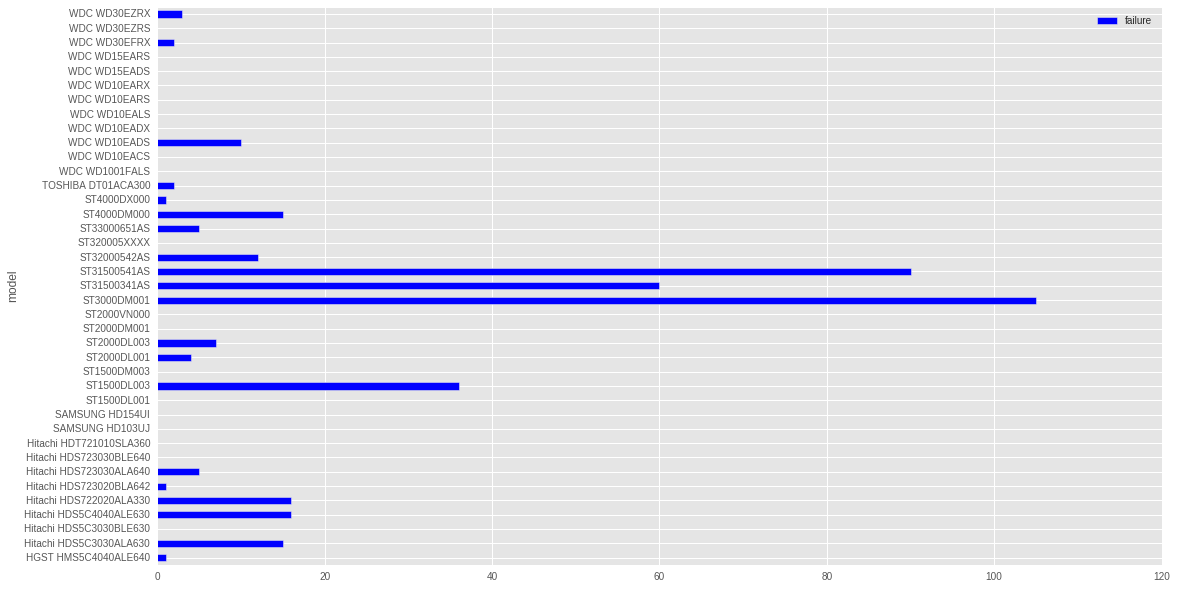

In [44]:
df_fail.plot(kind="barh",x="model",y="failure",figsize=(18,10))

In [45]:
# Exercise 4 : sort the above data frame and plot it

## Question 3. How do you compute failure rate for a model 

Now let us express the failure / total number of hard disks as ratio. This will give us an understanding of models and their failure behavior

To get that data, instead of computing again, we can join the 2 data frames that were previously computed
and compute the ratio

In [46]:

merged_df = df_model_serial.merge(df_fail,how='inner',on='model')

In [47]:
merged_df.head()

,model,total_HD,failure
0,WDC WD10EALS,1,0
1,Hitachi HDS5C3030BLE630,1,0
2,WDC WD15EADS,1,0
3,WDC WD1001FALS,1,0
4,ST1500DL001,2,0


let us see in total hard disks for a model, how many failed and how many did not


In [48]:
merged_df['success'] = merged_df.total_HD - merged_df.failure

In [49]:
merged_df.head()

,model,total_HD,failure,success
0,WDC WD10EALS,1,0,1
1,Hitachi HDS5C3030BLE630,1,0,1
2,WDC WD15EADS,1,0,1
3,WDC WD1001FALS,1,0,1
4,ST1500DL001,2,0,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b6277f5d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5b62453ed0>], dtype=object)

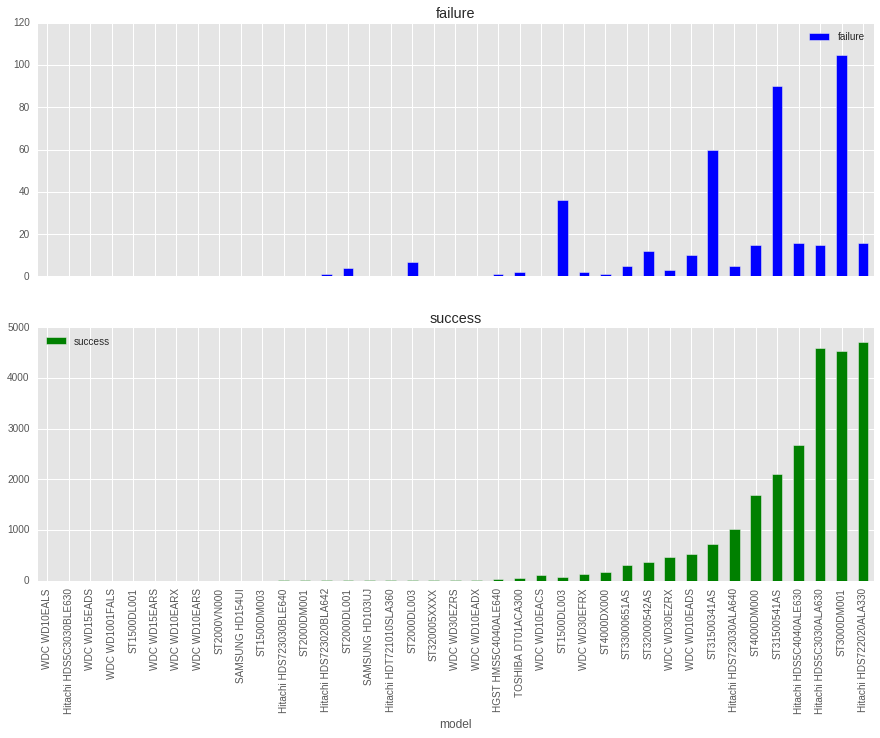

In [50]:
merged_df.plot(kind="bar",x="model",y=["failure","success"],subplots=True)

now let us compute the ratio of failure number/total_hard_disk of hard disk


In [51]:
merged_df['ratio_failure'] = merged_df.failure / merged_df.total_HD 

In [52]:
merged_df.head(25)

,model,total_HD,failure,success,ratio_failure
0,WDC WD10EALS,1,0,1,0.000000
1,Hitachi HDS5C3030BLE630,1,0,1,0.000000
2,WDC WD15EADS,1,0,1,0.000000
3,WDC WD1001FALS,1,0,1,0.000000
4,ST1500DL001,2,0,2,0.000000
5,WDC WD15EARS,3,0,3,0.000000
6,WDC WD10EARX,3,0,3,0.000000
7,WDC WD10EARS,4,0,4,0.000000
8,ST2000VN000,4,0,4,0.000000
9,SAMSUNG HD154UI,4,0,4,0.000000


In [53]:
merged_df.sort_values(by="ratio_failure",ascending=False,inplace=True)

In [54]:
merged_df.head()

,model,total_HD,failure,success,ratio_failure
17,ST2000DL003,15,7,8,0.466667
14,ST2000DL001,12,4,8,0.333333
24,ST1500DL003,113,36,77,0.318584
13,Hitachi HDS723020BLA642,8,1,7,0.125000
31,ST31500341AS,785,60,725,0.076433


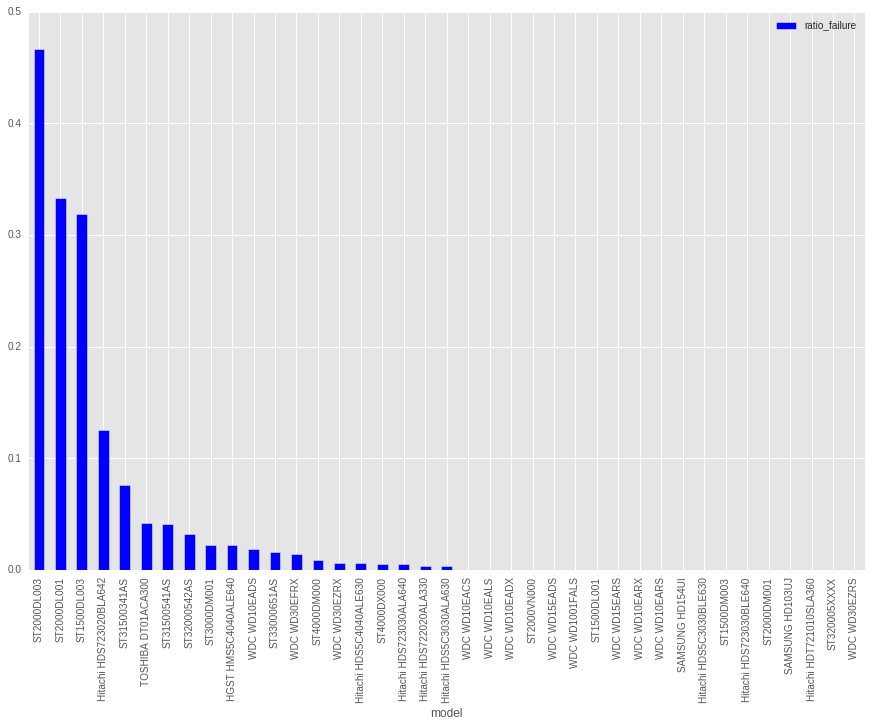

In [55]:
merged_df.plot(kind="bar",x="model",y="ratio_failure")

** The higher the ratio value is , the model is prone to failure **

In [56]:
#Exercise: Find ratio of success and plot it

In [57]:
#Exercise : Plot multiple bar charts comparing ratio of success and failure

** Now we know which models fail the most, let us introduce a new feature in our analysis, capacity. **

We are going feature by feature the reason being, the more features we add that add value to the outcome, we see how our understanding of the data starts to change.

** Let us look at the capacity **

In [58]:
df_capacity = pd.DataFrame(df.capacity.unique(),columns=['capacity'])

In [59]:
df_capacity.head()

,capacity
0,3000592982016
1,4000787030016
2,2000398934016
3,1500301910016
4,1000204886016


In [60]:
df_capacity.shape

(5, 1)

In [61]:
#Exercise : For a given capacity bytes, find the total number of failures and plot it

## Question 4. Given a model and capacity bytes, what does failure count look like

In [62]:
df_fail_mod_cap = pd.DataFrame(df.groupby(['model','capacity']).failure.sum())

In [63]:
df_fail_mod_cap.head()

,,failure
model,capacity,
HGST HMS5C4040ALE640,4000787030016,1
Hitachi HDS5C3030ALA630,3000592982016,15
Hitachi HDS5C3030BLE630,3000592982016,0
Hitachi HDS5C4040ALE630,4000787030016,16
Hitachi HDS722020ALA330,2000398934016,16


In [64]:
df_fail_mod_cap = df_fail_mod_cap.reset_index()

In [65]:
df_fail_mod_cap.head(25)

,model,capacity,failure
0,HGST HMS5C4040ALE640,4000787030016,1
1,Hitachi HDS5C3030ALA630,3000592982016,15
2,Hitachi HDS5C3030BLE630,3000592982016,0
3,Hitachi HDS5C4040ALE630,4000787030016,16
4,Hitachi HDS722020ALA330,2000398934016,16
5,Hitachi HDS723020BLA642,2000398934016,1
6,Hitachi HDS723030ALA640,3000592982016,5
7,Hitachi HDS723030BLE640,3000592982016,0
8,Hitachi HDT721010SLA360,1000204886016,0
9,SAMSUNG HD103UJ,1000204886016,0


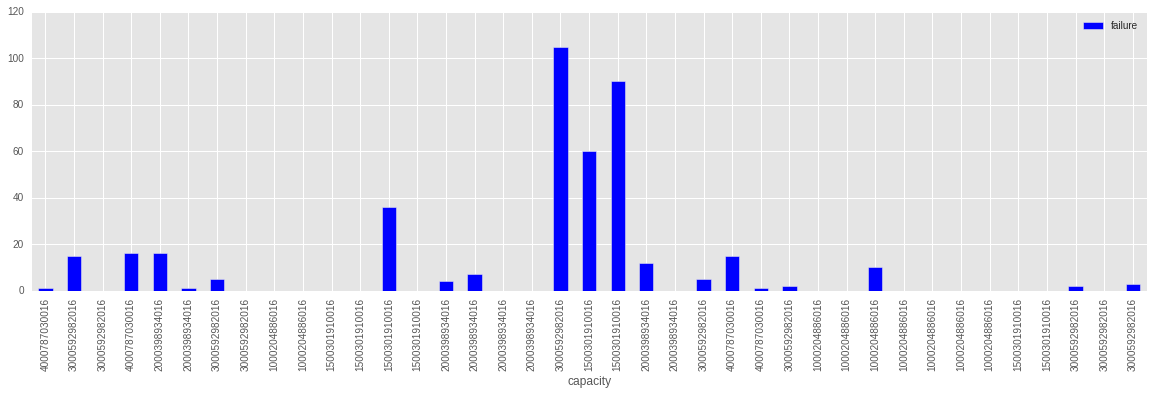

In [66]:
df_fail_mod_cap.plot(x="capacity",y="failure",kind="bar",figsize=(20,5))

### Looking at this chart can you tell what is not being represented right?

 We are having repeated entries for the same capacity and this really does not give us insights on the relation between capacity data and the models. 
 

In [67]:
df_fail_mod_cap.head()

,model,capacity,failure
0,HGST HMS5C4040ALE640,4000787030016,1
1,Hitachi HDS5C3030ALA630,3000592982016,15
2,Hitachi HDS5C3030BLE630,3000592982016,0
3,Hitachi HDS5C4040ALE630,4000787030016,16
4,Hitachi HDS722020ALA330,2000398934016,16


In [68]:
df_fail_mod_cap_pivot = df_fail_mod_cap.pivot("model","capacity","failure")

In [69]:
df_fail_mod_cap_pivot.head()

capacity,1000204886016,1500301910016,2000398934016,3000592982016,4000787030016
model,,,,,
HGST HMS5C4040ALE640,NaN,NaN,NaN,NaN,1
Hitachi HDS5C3030ALA630,NaN,NaN,NaN,15,NaN
Hitachi HDS5C3030BLE630,NaN,NaN,NaN,0,NaN
Hitachi HDS5C4040ALE630,NaN,NaN,NaN,NaN,16
Hitachi HDS722020ALA330,NaN,NaN,16,NaN,NaN


we see that for some models and their respective capacitys we do not have a fail count, lets fill it with 0

In [71]:
df_fail_mod_cap.fillna(0,inplace=True)
df_fail_mod_cap.head()

,model,capacity,failure
0,HGST HMS5C4040ALE640,4000787030016,1
1,Hitachi HDS5C3030ALA630,3000592982016,15
2,Hitachi HDS5C3030BLE630,3000592982016,0
3,Hitachi HDS5C4040ALE630,4000787030016,16
4,Hitachi HDS722020ALA330,2000398934016,16


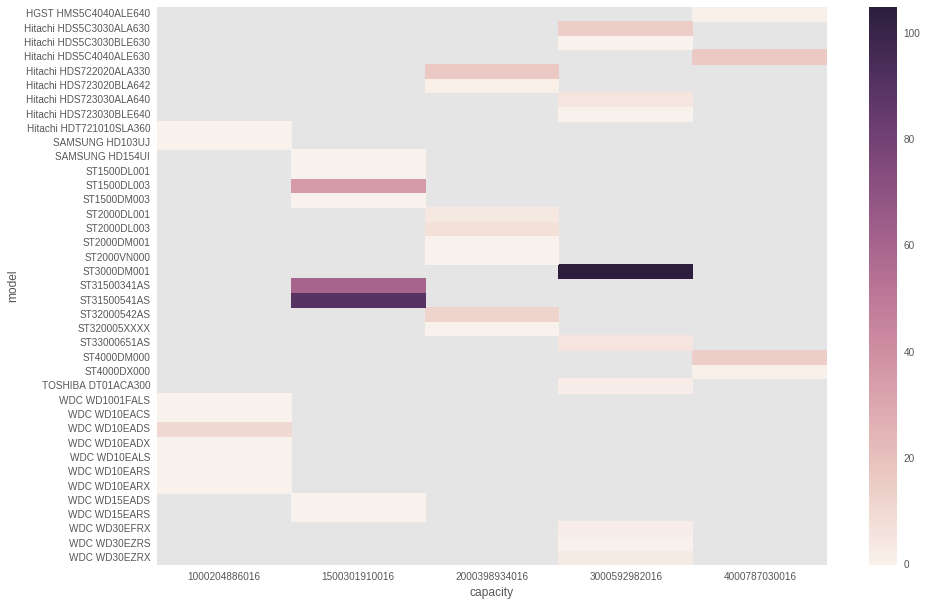

In [72]:
sns.heatmap(df_fail_mod_cap_pivot)

** This heat map gives us a better understanding of model, capacity vs failure **

In [73]:
#Exercise : Find count of success for a model with different capacities and plot it

##### The above charts give us an explanation of which models failed the most, which models had the most number of hard disks running , the ratio of hard disk : failure rate and hard disk and for a given capacity of a model what the failure count looks like

<img style="float:center" src="img/explore-clock.png" width=150/>

##### Hard disk data is time series data, so let us start using time

## Question 5. Let us count how many days each hard disk ran

In [74]:
df_days = pd.DataFrame(df.groupby(['capacity','serial']).date.count())

In [75]:
df_days = df_days.reset_index()
df_days.head()

,capacity,serial,date
0,1000204886016,S13PJDWS343088,132
1,1000204886016,S13PJDWS343395,132
2,1000204886016,S13PJDWS343397,132
3,1000204886016,S13PJDWS343398,132
4,1000204886016,S13PJDWS343399,132


In [76]:
df_days.columns = ['capacity','serial','total_days']

In [77]:
df_days.head()

,capacity,serial,total_days
0,1000204886016,S13PJDWS343088,132
1,1000204886016,S13PJDWS343395,132
2,1000204886016,S13PJDWS343397,132
3,1000204886016,S13PJDWS343398,132
4,1000204886016,S13PJDWS343399,132


In [78]:
df_days.capacity.value_counts()

3000592982016    11287
2000398934016     5171
4000787030016     4619
1500301910016     3100
1000204886016      714
Name: capacity, dtype: int64

In [79]:
df_days.shape

(24891, 3)

In [81]:
df_days_pivot = df_days.pivot('capacity','serial','total_days')

In [82]:
df_days_pivot.head()

serial,13H32WEAS,13H6A0DGS,13H6A21GS,13H87YWAS,13H89KSGS,13H8AB0GS,13H8B3SGS,13H8B43GS,5XW004AJ,5XW004Q0,...,Z300GZEG,Z300GZEH,Z300GZEK,Z300GZEN,Z300GZEP,Z300GZEQ,Z300GZES,Z300GZET,Z300GZEY,Z300GZEZ
capacity,,,,,,,,,,,,,,,,,,,,,
1000204886016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500301910016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000398934016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000592982016,116,122,90,98,98,103,103,116,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000787030016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,28,28,28,28,28,28,28,13,28


In [83]:
df_days_pivot.fillna(0,inplace=True)

In [84]:
df_days_pivot.head()

serial,13H32WEAS,13H6A0DGS,13H6A21GS,13H87YWAS,13H89KSGS,13H8AB0GS,13H8B3SGS,13H8B43GS,5XW004AJ,5XW004Q0,...,Z300GZEG,Z300GZEH,Z300GZEK,Z300GZEN,Z300GZEP,Z300GZEQ,Z300GZES,Z300GZET,Z300GZEY,Z300GZEZ
capacity,,,,,,,,,,,,,,,,,,,,,
1000204886016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1500301910016,0,0,0,0,0,0,0,0,122,132,...,0,0,0,0,0,0,0,0,0,0
2000398934016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3000592982016,116,122,90,98,98,103,103,116,0,0,...,0,0,0,0,0,0,0,0,0,0
4000787030016,0,0,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,28,28,13,28


In [ ]:
# Exercise : Visualize the above dataframe 

## Question 6. Find the average running time for failed hard disks and average running time for hard disks that have not failed

In [85]:
df_fail_days = pd.DataFrame(df[['capacity','serial','failure']].loc[df['failure'] == 1 ])

In [86]:
df_fail_days.head()

,capacity,serial,failure
2827,2000398934016,5YD48KS5,1
3462,1500301910016,9XW01DJ0,1
5071,1500301910016,9VS22HAQ,1
5843,2000398934016,JK1175YAHU30KX,1
8537,3000592982016,S1F11CSB,1


 <img style="float:center" src="img/sql-joins.jpg"/>

now let us merge the previous data frame which had serial number and count of days

In [88]:
df_fail_count = df_days.merge(df_fail_days,how="left",on=['capacity','serial'])

In [89]:
df_fail_count.head()

,capacity,serial,total_days,failure
0,1000204886016,S13PJDWS343088,132,NaN
1,1000204886016,S13PJDWS343395,132,NaN
2,1000204886016,S13PJDWS343397,132,NaN
3,1000204886016,S13PJDWS343398,132,NaN
4,1000204886016,S13PJDWS343399,132,NaN


In [90]:
df_fail_count.fillna(0,inplace=True)

In [91]:
df_fail_count.head()

,capacity,serial,total_days,failure
0,1000204886016,S13PJDWS343088,132,0
1,1000204886016,S13PJDWS343395,132,0
2,1000204886016,S13PJDWS343397,132,0
3,1000204886016,S13PJDWS343398,132,0
4,1000204886016,S13PJDWS343399,132,0


In [92]:
df_fail_count.dtypes

capacity        int64
serial         object
total_days      int64
failure       float64
dtype: object

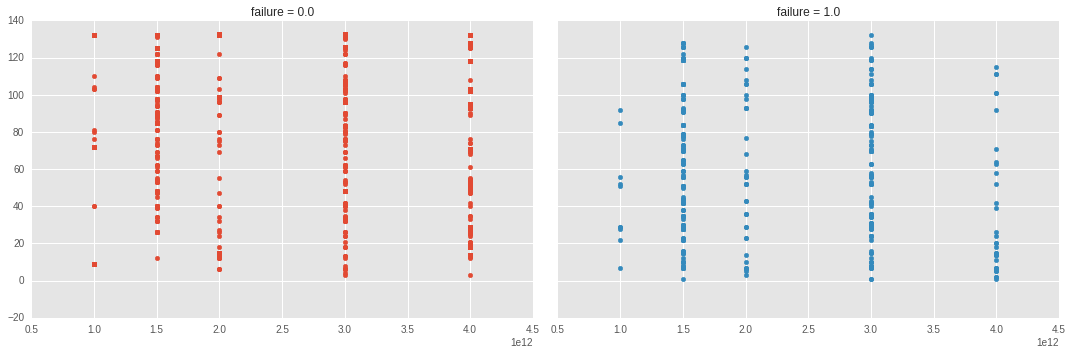

In [93]:
g = sns.FacetGrid(df_fail_count, col="failure",hue='failure',size=5,aspect=1.5)
g.map_dataframe(plt.scatter,x='capacity',y='total_days')

Now what can we do with this data? Is this useful? What can I generate from the above data that gives 
me a little more insight ?

>We can generate what is the average time of failure and average success time for capacity

In [96]:
df_fail_count_avg = pd.DataFrame(df_fail_count.groupby(['capacity','failure']).total_days.mean())

In [97]:
df_fail_count_avg.head()

total_days
capacity      failure            
1000204886016 0        119.661932
              1         45.100000
1500301910016 0        128.147563
              1         62.897849
2000398934016 0        130.180667

In [98]:
df_fail_count_avg = df_fail_count_avg.reset_index()

In [99]:
df_fail_count_avg.head()

,capacity,failure,total_days
0,1000204886016,0,119.661932
1,1000204886016,1,45.100000
2,1500301910016,0,128.147563
3,1500301910016,1,62.897849
4,2000398934016,0,130.180667


In [100]:
df_fail_count_avg_pivot = df_fail_count_avg.pivot('capacity','failure','total_days')

In [101]:
df_fail_count_avg_pivot.head()

failure,0.0,1.0
capacity,,
1000204886016,119.661932,45.100000
1500301910016,128.147563,62.897849
2000398934016,130.180667,60.525000
3000592982016,130.496056,62.802920
4000787030016,85.051461,38.212121


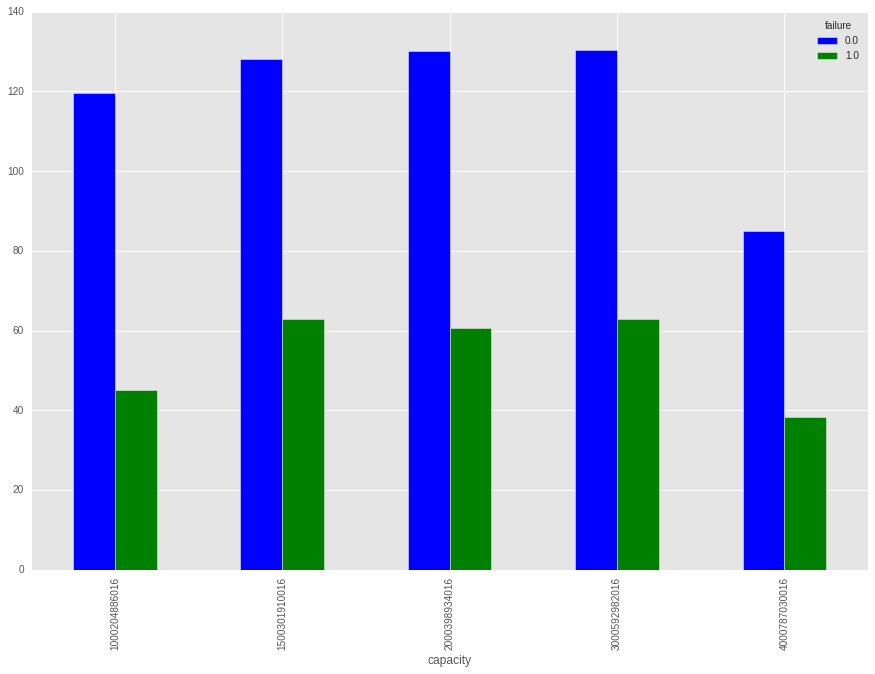

In [102]:
df_fail_count_avg_pivot.plot(kind="bar")

## Question 7. How about using hours (SMART_9) column now and co-relate it with failure

In [103]:
df_hours = df[['serial','capacity','failure','smart_9']]

In [104]:
df_hours.head()

,serial,capacity,failure,smart_9
0,MJ0351YNG9Z0XA,3000592982016,0,6887
1,MJ0351YNG9Z7LA,3000592982016,0,6444
2,MJ0351YNGABYAA,3000592982016,0,5592
3,PL1321LAG34XWH,4000787030016,0,3555
4,PL1311LAG2205A,4000787030016,0,3557


In [105]:
df_hours.shape

(2995393, 4)

Now we want to know upto when for a given hard disk and capacity , how long the hard disk ran

In [107]:
df_hours_max = pd.DataFrame(df_hours.groupby(['serial','capacity']).smart_9.max())

In [108]:
df_hours_max.head()

,,smart_9
serial,capacity,
13H32WEAS,3000592982016,2768
13H6A0DGS,3000592982016,2916
13H6A21GS,3000592982016,2150
13H87YWAS,3000592982016,2335
13H89KSGS,3000592982016,2338


In [109]:
df_hours_max.shape

(24891, 1)

In [110]:
df_hours_max = df_hours_max.reset_index()

In [112]:
df_hours_max_merge = df_hours_max.merge(df_hours,on=['serial','capacity','smart_9'],how='inner')

In [113]:
df_hours_max_merge.head()

,serial,capacity,smart_9,failure
0,13H32WEAS,3000592982016,2768,0
1,13H6A0DGS,3000592982016,2916,0
2,13H6A21GS,3000592982016,2150,0
3,13H87YWAS,3000592982016,2335,0
4,13H89KSGS,3000592982016,2338,0


In [114]:
df_hours_max_merge_pivot = pd.pivot_table(df_hours_max_merge,index='capacity',columns='failure',values='smart_9'
                                          ,aggfunc='mean')

In [115]:
df_hours_max_merge_pivot.head()

failure,0,1
capacity,,
1000204886016,32804.016807,25793.100000
1500301910016,29068.808882,22816.983871
2000398934016,21015.577918,11491.225000
3000592982016,10409.604852,8545.542636
4000787030016,2632.861755,1552.787879


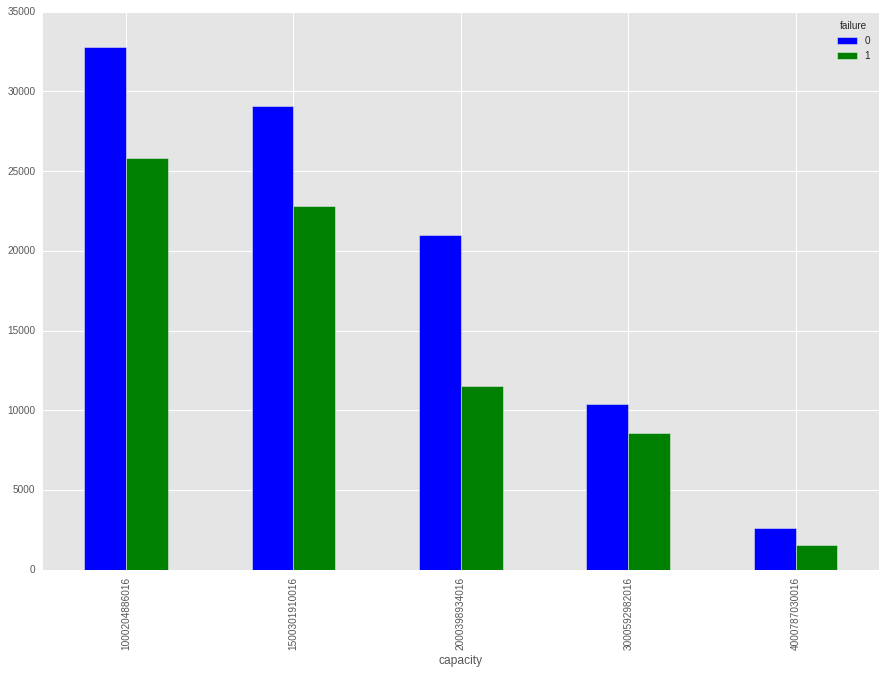

In [116]:
df_hours_max_merge_pivot.plot(kind='bar')

## Question 8. Given the data , identify the model and capacity of the hard disk to buy based on how long it runs 

In [117]:
df_model_capacity_hours = df[['model','capacity','failure','smart_9']]

In [118]:
df_model_capacity_hours.head()

,model,capacity,failure,smart_9
0,Hitachi HDS5C3030ALA630,3000592982016,0,6887
1,Hitachi HDS5C3030ALA630,3000592982016,0,6444
2,Hitachi HDS5C3030ALA630,3000592982016,0,5592
3,Hitachi HDS5C4040ALE630,4000787030016,0,3555
4,Hitachi HDS5C4040ALE630,4000787030016,0,3557


Let us convert bytes to gigabytes and round it to the nearest number

In [119]:
df_model_capacity_hours.capacity = df_model_capacity_hours.capacity / 1024 ** 3

/home/nischal/code/intro-python-data-science/venv/local/lib/python2.7/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [120]:
df_model_capacity_hours.head()

,model,capacity,failure,smart_9
0,Hitachi HDS5C3030ALA630,2794.519981,0,6887
1,Hitachi HDS5C3030ALA630,2794.519981,0,6444
2,Hitachi HDS5C3030ALA630,2794.519981,0,5592
3,Hitachi HDS5C4040ALE630,3726.023277,0,3555
4,Hitachi HDS5C4040ALE630,3726.023277,0,3557


In [121]:
df_model_capacity_hours.capacity = df_model_capacity_hours.capacity.astype(np.int64)

In [122]:
df_model_capacity_hours.head()

,model,capacity,failure,smart_9
0,Hitachi HDS5C3030ALA630,2794,0,6887
1,Hitachi HDS5C3030ALA630,2794,0,6444
2,Hitachi HDS5C3030ALA630,2794,0,5592
3,Hitachi HDS5C4040ALE630,3726,0,3555
4,Hitachi HDS5C4040ALE630,3726,0,3557


In [123]:
df_model_capacity_hours_pivot = pd.pivot_table(data=df_model_capacity_hours,index='model',columns=['failure','capacity'],
                                               values='smart_9',aggfunc='mean')

In [124]:
df_model_capacity_hours_pivot.head()

failure                    0                                               \
capacity                931  1397          1863         2794         3726   
model                                                                       
HGST HMS5C4040ALE640     NaN  NaN           NaN          NaN  5091.673547   
Hitachi HDS5C3030ALA630  NaN  NaN           NaN  9807.680484          NaN   
Hitachi HDS5C3030BLE630  NaN  NaN           NaN  2392.719697          NaN   
Hitachi HDS5C4040ALE630  NaN  NaN           NaN          NaN  2321.923817   
Hitachi HDS722020ALA330  NaN  NaN  20663.148603          NaN          NaN   

failure                    1                                     
capacity                931  1397       1863    2794       3726  
model                                                            
HGST HMS5C4040ALE640     NaN  NaN        NaN     NaN  3557.0000  
Hitachi HDS5C3030ALA630  NaN  NaN        NaN  7669.8        NaN  
Hitachi HDS5C3030BLE630  NaN  NaN        NaN     NaN        NaN  
Hitachi HDS5C4040ALE630  NaN  NaN        NaN     NaN  2550.3125  
Hitachi HDS722020ALA330  NaN  NaN  21314.625     NaN        NaN

In [125]:
df_model_capacity_hours_pivot.fillna(0,inplace=True)

In [126]:
df_model_capacity_hours_pivot.head()

failure                    0                                               \
capacity                931  1397          1863         2794         3726   
model                                                                       
HGST HMS5C4040ALE640       0    0      0.000000     0.000000  5091.673547   
Hitachi HDS5C3030ALA630    0    0      0.000000  9807.680484     0.000000   
Hitachi HDS5C3030BLE630    0    0      0.000000  2392.719697     0.000000   
Hitachi HDS5C4040ALE630    0    0      0.000000     0.000000  2321.923817   
Hitachi HDS722020ALA330    0    0  20663.148603     0.000000     0.000000   

failure                    1                                     
capacity                931  1397       1863    2794       3726  
model                                                            
HGST HMS5C4040ALE640       0    0      0.000     0.0  3557.0000  
Hitachi HDS5C3030ALA630    0    0      0.000  7669.8     0.0000  
Hitachi HDS5C3030BLE630    0    0      0.000     0.0     0.0000  
Hitachi HDS5C4040ALE630    0    0      0.000     0.0  2550.3125  
Hitachi HDS722020ALA330    0    0  21314.625     0.0     0.0000

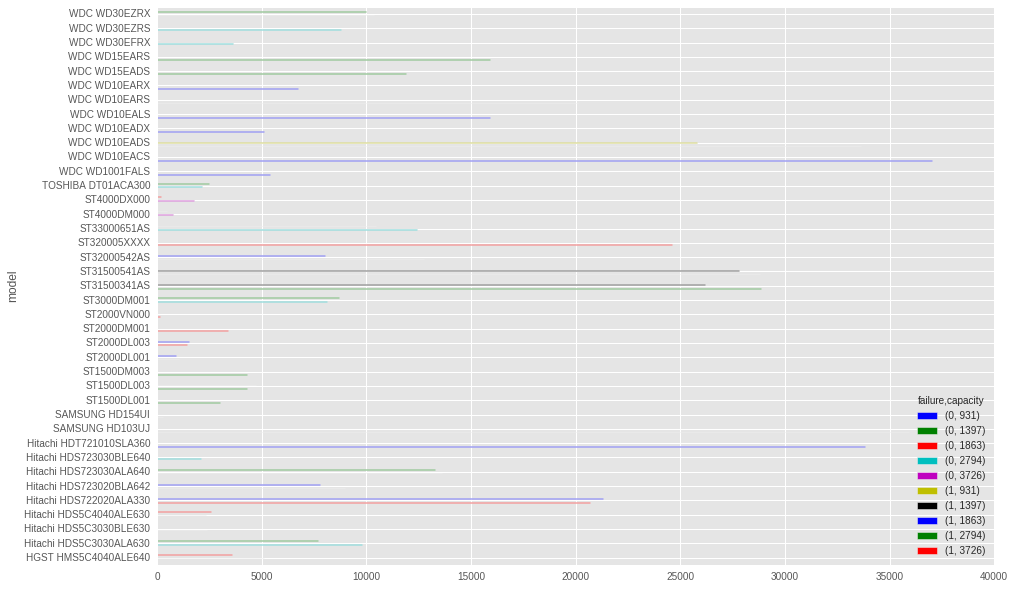

In [127]:
df_model_capacity_hours_pivot.plot(kind="barh")

** The above visualization is confusing as the bars reflect combination of failure and hours count **

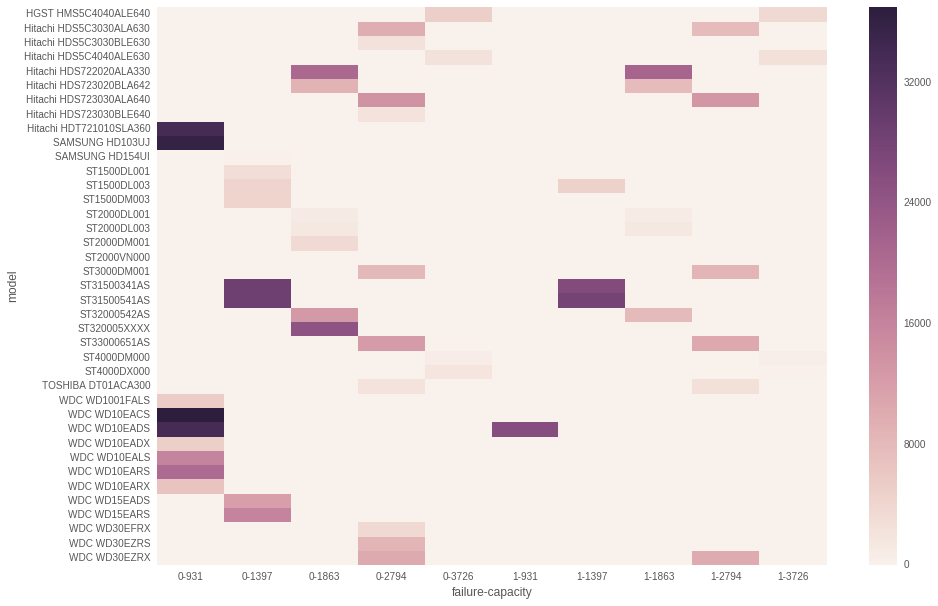

In [128]:
sns.heatmap(df_model_capacity_hours_pivot)